<h1>Best College In The NBA</h1>

In this we will look to find who is the successful College in the league.
<br>
We will examine the player by their colleges, and reward them depand on there award.
<br>
We will use the database created in `CreateDB.ipynb`, merge the career stats and awards with there basic information and find a formula to grade each college.
<br>
<h3>Steps:</h3>

 * Merging the stats based on their ID (the scraping is from basketball-refernce.com so the ID is identical)
 * Removing the players that played in europe or came from high school
 * Counting the number of players that came from top 20 colleges to get a first glimpse of the dataset
 * Giving a grade to each award based on his importance and giving it scale

In [62]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

## Loading DB

In [2]:
regularTotSeason = pd.read_csv('Data/CSV Files/Database/first82TotSeasons.csv')
playoffTotSeason = pd.read_csv('Data/CSV Files/Database/playoffTotSeasons.csv')

regularAVGSeason = pd.read_csv('Data/CSV Files/Database/first82AVGSeasons.csv')
playoffAVGSeason = pd.read_csv('Data/CSV Files/Database/playoffAVGSeasons.csv')

careerTotPlayer = pd.read_csv('Data/CSV Files/Database/CareerTotPlayerScrape.csv')
careerAVGPlayer = pd.read_csv('Data/CSV Files/Database/CareerAVGPlayerScrape.csv')
moreInfoPlayer = pd.read_csv('Data/CSV Files/Database/MoreInfoPerPlayer.csv')

singlePlayerAward = pd.read_csv('Data/CSV Files/Awards/singlePlayerAwards.csv')
allNBATeam = pd.read_csv('Data/CSV Files/Awards/AllNBATeam.csv')
nbaAllStar = pd.read_csv('Data/CSV Files/Awards/NBAAllStar.csv')
nbaDefence = pd.read_csv('Data/CSV Files/Awards/NBAAllDefenceNum.csv')

To find the use the most of our database we need to merge the 2 DB based on the id of the row

In [3]:
del moreInfoPlayer['Player']
moreInfoPlayer

,ID,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
0,greenac01,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
1,bramlaj01,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,engliaj01,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,guytoaj01,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hammoaj01,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,priceaj01,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,wyndeaj01,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,brookaa01,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,gordoaa01,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,grayaa01,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
careerAVGPlayer

,ID,Player,Years,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,PF,1431,941.0,28.421,3.493,7.100,49.197183,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,C,8,0.0,7.625,0.500,2.625,19.047619,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,SG,151,18.0,20.583,4.086,9.391,43.509743,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,PG,80,14.0,15.575,2.075,5.500,37.727273,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,C,22,0.0,7.409,0.773,1.909,40.492404,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,PG,270,25.0,14.874,2.085,5.485,38.012762,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,PG,6,0.0,6.500,0.500,2.000,25.000000,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,PG,685,196.0,20.645,3.480,8.429,41.286036,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,PF,341,252.0,27.859,4.707,10.449,45.047373,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,C,326,87.0,12.107,1.377,2.696,51.075668,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


In [5]:
# careerAVGPlayer = pd.read_csv('Data/CSV Files/Database/careerAVGPlayer.csv')
careerTotalDB = pd.merge(careerAVGPlayer, moreInfoPlayer, on='ID', how = 'inner')

# careerTotalDB = careerTotalDB[careerTotalDB['From']> 0]
careerTotalDB = careerTotalDB.reindex(columns=['ID','Player', 'Years'] +list(careerTotalDB.columns[-22:]) + (list(careerTotalDB.columns[2:-22:])))
careerTotalDB = careerTotalDB.sort_values('Player', ascending=True)
careerTotalDB = careerTotalDB.fillna(0)
# careerTotPlayer = careerTotPlayer.drop(careerTotPlayer.columns[-9:], axis=1)
# careerTotPlayer = careerTotPlayer[2:]
careerTotalDB

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


In [6]:

dupliPlayer = careerTotPlayer[careerTotPlayer['ID'].duplicated()]
dupliPlayer

,ID,Player,Years,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR


In [7]:
careerTotalDB.to_csv('Data/CSV Files/Database/careerAVGPlayer.csv', index=False)

In [8]:
careerTotalDB = pd.read_csv('Data/CSV Files/Database/careerAVGPlayer.csv')

In [9]:
careerTotalDB.columns

Index(['ID', 'Player', 'Years', 'From', 'To', 'Ht(cm)', 'Wt(kg)', 'Birth Date',
       'Colleges', 'MVP', 'Finals MVP', 'All-Star MVP', 'Most Improved',
       'Sixth Man', 'Defence Player', 'Rookie', 'All 1st', 'All 2nd',
       'All 3rd', 'All Tot', 'All-Star', 'D Tot', 'D 1st', 'D 2nd',
       'Total Awards', 'Years.1', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PIR'],
      dtype='object')

## Creating Database of only college players

In [10]:
careerTotalDB = careerTotalDB[careerTotalDB['Colleges'] != '0']
careerTotalDB

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


In [11]:
collegeCareerTotPlayer = careerTotalDB[careerTotalDB['Colleges'] != 'None']
collegeCareerTotPlayer.columns

Index(['ID', 'Player', 'Years', 'From', 'To', 'Ht(cm)', 'Wt(kg)', 'Birth Date',
       'Colleges', 'MVP', 'Finals MVP', 'All-Star MVP', 'Most Improved',
       'Sixth Man', 'Defence Player', 'Rookie', 'All 1st', 'All 2nd',
       'All 3rd', 'All Tot', 'All-Star', 'D Tot', 'D 1st', 'D 2nd',
       'Total Awards', 'Years.1', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PIR'],
      dtype='object')

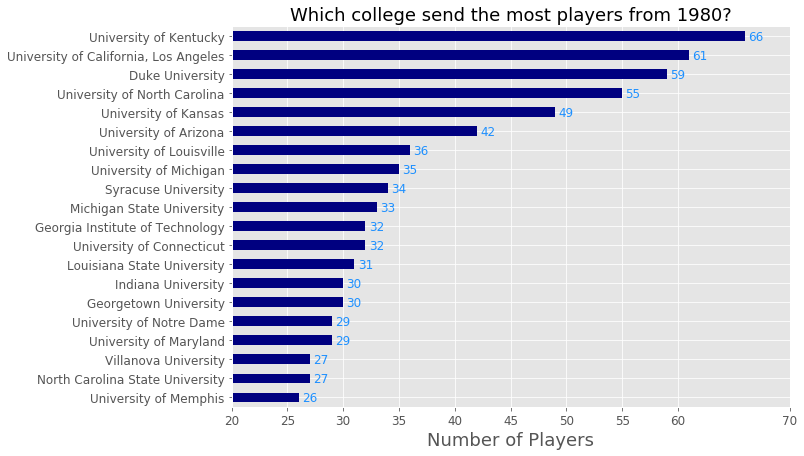

In [12]:
college = (collegeCareerTotPlayer['Colleges'].value_counts())
college = college.iloc[0:]
collegeDF = pd.DataFrame(college)
top20 = collegeDF.head(20)

# plotb = top30.plot(kind='bar')
# # Showing on the range from 7000-8100, shows the diffrence better in the plot
# plotb = plotb.set_ylim([20,70])
# plotb.invert_yaxis()
# print(plotb)

ax = top20.plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which college send the most players from 1980?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
ax.set_xticks([20, 25 ,30, 35, 40, 45, 50, 55, 60, 70])
ax.set_xlim([20,70])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

In [13]:
collegeComma = collegeCareerTotPlayer[collegeCareerTotPlayer['Colleges'].str.contains(',') > 0]
# x = []
# for i in range(0, len(collegeComma)):
#     x.append(collegeComma['Colleges'].values[i].split(',')[0])
# #     collegeComma.Colleges[i] = x[0]
# #     print(x)
# collegeComma['Colleges'] = x
# collegeComma

In [14]:
collegeCV = (collegeComma['Colleges'].value_counts())
# collegeCV = pd.DataFrame(collegeCV)
collegeCV = pd.DataFrame(collegeCV)
collegeCVList = np.array(collegeCV.index, dtype=pd.Series)[8:]
collegeCVList

array(['Midland College, University of Oklahoma',
       'University of North Carolina, University of California, Los Angeles',
       'University of California, California State University, Fresno',
       'Alcorn State University, Jackson State University',
       'University of Central Florida, Oklahoma State University',
       'University of Kentucky, University of Southern California',
       'Seward County Community College, Oklahoma State University',
       'Baylor University, Oklahoma State University',
       'Auburn University, University of South Carolina',
       'Upsala College, Morehead State University',
       'University of Virginia, Vanderbilt University',
       'Georgetown University, Wake Forest University',
       'University of California, Los Angeles, University of Texas at El Paso',
       'Wichita State University, University of Texas at Austin',
       'University of Colorado, University of Iowa',
       'DePaul University, University of Louisiana at Monroe

In [15]:
collegeToChange = collegeComma[collegeComma['Colleges'].isin(collegeCVList)]
collegeToChange.head()

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
17,naderab01,Abdel Nader,2.0,2018.0,2019.0,198.12,225.0,"September 25, 1993","Northern Illinois University, Iowa State Unive...",0.0,...,0.233,1.350,1.583,0.408,0.300,0.192,0.517,0.958,3.325,2.167
20,harriad01,Adam Harrington,1.0,2003.0,2003.0,195.58,200.0,"July 5, 1980","North Carolina State University, Auburn Univer...",0.0,...,0.053,0.368,0.421,0.632,0.105,0.053,0.105,0.421,1.579,0.842
28,caldwad01,Adrian Caldwell,6.0,1990.0,1998.0,203.20,265.0,"July 4, 1966","Southern Methodist University, Lamar University",0.0,...,0.905,1.593,2.497,0.166,0.281,0.206,0.633,1.357,1.970,1.879
59,stephal01,Alex Stepheson,1.0,2016.0,2016.0,208.28,270.0,"August 7, 1987","University of North Carolina, University of So...",0.0,...,2.375,1.125,3.500,0.250,0.125,0.625,0.000,1.500,2.750,2.500


In [16]:
x = []
for i in range(0, len(collegeToChange)):
    x.append(collegeToChange['Colleges'].values[i].split(',')[0])
#     collegeComma.Colleges[i] = x[0]
# print(x)
collegeToChange['Colleges'] = x
collegeToChange

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964",University of Massachusetts Amherst,0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
17,naderab01,Abdel Nader,2.0,2018.0,2019.0,198.12,225.0,"September 25, 1993",Northern Illinois University,0.0,...,0.233,1.350,1.583,0.408,0.300,0.192,0.517,0.958,3.325,2.167
20,harriad01,Adam Harrington,1.0,2003.0,2003.0,195.58,200.0,"July 5, 1980",North Carolina State University,0.0,...,0.053,0.368,0.421,0.632,0.105,0.053,0.105,0.421,1.579,0.842
28,caldwad01,Adrian Caldwell,6.0,1990.0,1998.0,203.20,265.0,"July 4, 1966",Southern Methodist University,0.0,...,0.905,1.593,2.497,0.166,0.281,0.206,0.633,1.357,1.970,1.879
59,stephal01,Alex Stepheson,1.0,2016.0,2016.0,208.28,270.0,"August 7, 1987",University of North Carolina,0.0,...,2.375,1.125,3.500,0.250,0.125,0.625,0.000,1.500,2.750,2.500
60,stivral01,Alex Stivrins,2.0,1986.0,1993.0,203.20,220.0,"November 29, 1962",Creighton University,0.0,...,0.455,0.545,1.000,0.182,0.091,0.091,0.455,0.591,2.000,1.091
99,owensan01,Andre Owens,2.0,2006.0,2008.0,193.04,200.0,"October 31, 1980",Indiana University,0.0,...,0.444,0.815,1.259,1.019,0.333,0.056,0.685,1.148,3.556,2.000
117,whitean01,Andrew White,1.0,2018.0,2018.0,200.66,210.0,"June 16, 1993",University of Nebraska,0.0,...,0.267,2.000,2.267,0.400,0.200,0.067,0.533,0.800,4.600,2.800
141,jonesan01,Anthony Jones,3.0,1987.0,1990.0,198.12,195.0,"September 13, 1962",Georgetown University,0.0,...,0.527,0.770,1.297,0.721,0.515,0.230,0.582,1.067,3.600,2.291
152,tuckean01,Anthony Tucker,1.0,1995.0,1995.0,203.20,220.0,"April 4, 1969",Georgetown University,0.0,...,0.710,2.032,2.742,1.097,0.742,0.177,0.903,2.081,3.919,3.339


In [17]:
times = collegeCareerTotPlayer[collegeCareerTotPlayer['Colleges'].isin(collegeCVList)].shape[0]
print(times)
colleg = []
for x in range(0, times):
    colleg.append(collegeToChange['Colleges'].values[i].split(',')[0])
collegeCareerTotPlayer[collegeCareerTotPlayer['Colleges'].isin(collegeCVList)]['Colleges'] = colleg
# colleg
collegeCareerTotPlayer

265


C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


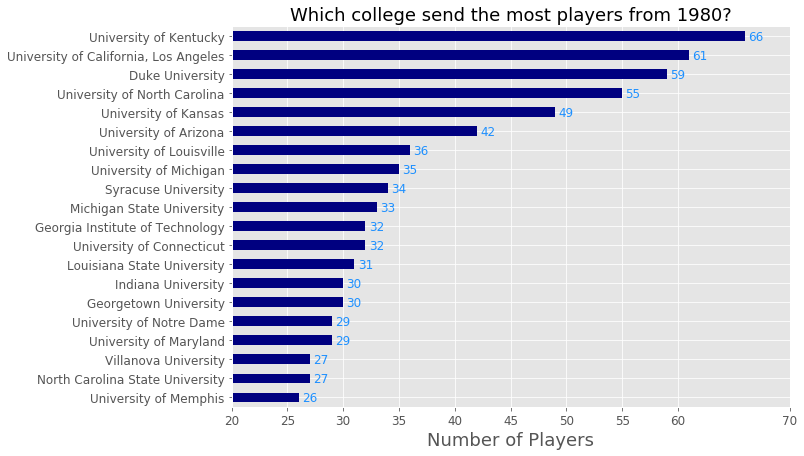

In [18]:
college = (collegeCareerTotPlayer['Colleges'].value_counts())
college = college.iloc[0:]
collegeDF = pd.DataFrame(college)
top20 = collegeDF.head(20)

# plotb = top30.plot(kind='bar')
# # Showing on the range from 7000-8100, shows the diffrence better in the plot
# plotb = plotb.set_ylim([20,70])
# plotb.invert_yaxis()
# print(plotb)

ax = top20.plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which college send the most players from 1980?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
ax.set_xticks([20, 25 ,30, 35, 40, 45, 50, 55, 60, 70])
ax.set_xlim([20,70])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

In [19]:
collegeCareerTotPlayer.to_csv('Data/CSV Files/Database/FullNBAPlayersColleges.csv', index=False)

In [20]:
collegeCareerTotPlayer = pd.read_csv('Data/CSV Files/Database/FullNBAPlayersColleges.csv')
collegeCareerTotPlayer

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


In [21]:
collegeCareerTotPlayer.columns

Index(['ID', 'Player', 'Years', 'From', 'To', 'Ht(cm)', 'Wt(kg)', 'Birth Date',
       'Colleges', 'MVP', 'Finals MVP', 'All-Star MVP', 'Most Improved',
       'Sixth Man', 'Defence Player', 'Rookie', 'All 1st', 'All 2nd',
       'All 3rd', 'All Tot', 'All-Star', 'D Tot', 'D 1st', 'D 2nd',
       'Total Awards', 'Years.1', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PIR'],
      dtype='object')

In [22]:
collegeCareerTotPlayer.to_csv('Data/CSV Files/Database/FullNBAPlayersColleges.csv', index=False)

In [23]:
prizedPlayers = collegeCareerTotPlayer[collegeCareerTotPlayer['Total Awards'] > 0]
prizedPlayers

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
13,mckieaa01,Aaron McKie,13.0,1995.0,2007.0,195.58,209.0,"October 2, 1972",Temple University,0.0,...,0.607,2.688,3.295,2.722,1.144,0.202,1.336,2.050,7.582,7.460
30,horfoal01,Al Horford,12.0,2008.0,2019.0,208.28,245.0,"June 3, 1986",University of Florida,0.0,...,2.135,6.217,8.352,3.264,0.810,1.207,1.609,2.319,14.069,17.824
37,hendeal01,Alan Henderson,12.0,1996.0,2007.0,205.74,235.0,"December 2, 1972",Indiana University,0.0,...,2.145,2.724,4.869,0.593,0.539,0.446,1.077,2.198,7.666,6.545
60,houstal01,Allan Houston,12.0,1994.0,2005.0,198.12,200.0,"April 20, 1971",University of Tennessee,0.0,...,0.412,2.490,2.902,2.360,0.675,0.165,2.132,2.453,17.478,10.507
63,iversal01,Allen Iverson,14.0,1997.0,2010.0,182.88,165.0,"June 7, 1975",Georgetown University,1.0,...,0.816,2.907,3.723,6.141,2.162,0.181,3.536,1.963,26.882,18.862
66,mournal01,Alonzo Mourning,15.0,1993.0,2008.0,208.28,240.0,"February 8, 1970",Georgetown University,0.0,...,2.533,5.830,8.362,1.101,0.492,2.756,2.610,3.365,16.722,15.926
72,roberal01,Alvin Robertson,10.0,1985.0,1996.0,190.50,185.0,"July 22, 1962",University of Arkansas,0.0,...,2.081,3.140,5.221,5.063,2.712,0.410,2.721,3.398,14.071,14.319
81,drumman01,Andre Drummond,7.0,2013.0,2019.0,210.82,279.0,"August 10, 1993",University of Connecticut,0.0,...,4.799,8.864,13.663,1.147,1.332,1.559,1.782,3.139,14.154,19.209


In [24]:
prizedPlayers.to_csv('Data/CSV Files/Database/PrizedPlayersColleges.csv', index=False)

In [25]:
collegeList = collegeCareerTotPlayer.drop_duplicates(subset='Colleges', keep='first')
collegeList = collegeList.iloc[:, 8].tolist()
collegeList = np.array(collegeList, dtype=pd.Series)
print(collegeList)

['Oregon State University' 'University of Arizona'
 'Virginia Union University' 'Indiana University' 'Purdue University'
 'University of Connecticut'
 'University of Massachusetts Amherst, Fairfield University'
 'University of Oregon' 'University of Pittsburgh'
 'University of Kentucky' 'University of California, Los Angeles'
 'Duquesne University' 'Temple University' 'University of Kansas'
 'Auburn University' 'Xavier University'
 'Northern Illinois University, Iowa State University'
 'University of Iowa' 'Texas A&M University'
 'North Carolina State University, Auburn University'
 'Stanford University' 'Gonzaga University' 'Colgate University'
 'University of Memphis' 'Michigan State University'
 'University of Maryland'
 'Southern Methodist University, Lamar University' 'Seton Hall University'
 'University of Florida' 'Florida State University'
 'University of North Carolina' 'Wake Forest University' 'Duke University'
 'University of Michigan' 'University of Alabama at Birmingham'
 

In [26]:
collStats = []
collegeSuccess = pd.DataFrame()
collegeSuccessCol = ['College', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie', 'Total Prized Players']
for c in range(0, len(collegeList) - 1):
    collStats = []
    tot = 0
    currColl = collegeCareerTotPlayer[collegeCareerTotPlayer.Colleges == collegeList[c]]
#     College Name
    collStats.append(collegeList[c])
#     Precent of All-Star
    currAllStar = currColl[currColl['All Tot'] > 0].shape[0]
    collStats.append(currAllStar)
    currDefenceTeam = currColl[currColl['D Tot'] > 0].shape[0]
    collStats.append(currDefenceTeam)
    for i in range(3, len(collegeSuccessCol) - 1):
#     Precent of All-NBA Team
        currStats = currColl[currColl[collegeSuccessCol[i]] > 0].shape[0]
        collStats.append(currStats)
    tot = (prizedPlayers[prizedPlayers['Colleges'] == collegeList[c]]).shape[0]
    collStats.append(tot)
    collStats = pd.DataFrame(collStats)
    collStats = pd.DataFrame(collStats.transpose())
    collStats.columns = collegeSuccessCol
    collegeSuccess = pd.concat([collegeSuccess, collStats])
# collegeSuccess['Tot'] = collegeSuccess['All Star'] + collegeSuccess['All-NBA'] + collegeSuccess['Defence']
collegeSuccess = collegeSuccess.sort_values('Total Prized Players', ascending=False)
# collegeSuccess.set_index("College", inplace = True) 
collegeSuccess.head()

,College,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Prized Players
0,University of Kentucky,6,5,8,0,0,0,0,0,1,10
0,University of Connecticut,3,1,6,0,2,0,0,0,1,8
0,University of North Carolina,4,2,7,1,1,1,2,0,2,8
0,"University of California, Los Angeles",4,2,7,1,0,1,0,2,0,8
0,Duke University,4,2,6,0,0,0,0,0,3,7


In [27]:
collStats1 = []
collegeSuccess1 = pd.DataFrame()
collegeSuccessCol1 = ['College', 'Year/PLR', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie', 'Total Awards']
for c in range(0, len(collegeList) - 1):
    collStats1 = []
    tot1 = 0
    currColl1 = collegeCareerTotPlayer[collegeCareerTotPlayer.Colleges == collegeList[c]]
#     College Name
    collStats1.append(collegeList[c])
#     Years For Player
    numOfPlayers = currColl1.shape[0]
    collStats1.append(currColl1['Years'].sum() / numOfPlayers)
#     Precent of All-Star
    currAllStar1 = currColl1[currColl1['All Tot'] > 0]['All Tot'].sum()
    collStats1.append((int)(currAllStar1))
    currDefenceTeam1 = currColl1[currColl1['D Tot'] > 0]['D Tot'].sum()
    collStats1.append(currDefenceTeam1)
    tot1 = tot1 + currAllStar1 + currDefenceTeam1
    for i in range(4, len(collegeSuccessCol1) - 1):
#     Precent of All-NBA Team
        currStats1 = currColl1[currColl1[collegeSuccessCol1[i]] > 0][collegeSuccessCol1[i]].sum()
        collStats1.append((int)(currStats1))
        tot1 = tot1 + currStats1
    collStats1.append(tot1)
    collStats1 = pd.DataFrame(collStats1)
    collStats1 = pd.DataFrame(collStats1.transpose())
    collStats1.columns = collegeSuccessCol1
    
    collegeSuccess1 = pd.concat([collegeSuccess1, collStats1])
# collegeSuccess['Tot'] = collegeSuccess['All Star'] + collegeSuccess['All-NBA'] + collegeSuccess['Defence']
addPrizedPlayer = collegeSuccess[['College', 'Total Prized Players']]
collegeSuccess1 = pd.merge(collegeSuccess1, addPrizedPlayer, on='College', how='inner')
rating = []
totalPlayers = pd.Series(collegeSuccess1['Total Prized Players'])
for r in range(0 ,len(collegeSuccess1)):
    if (totalPlayers.values[r] > 0):
        rating.append(round((collegeSuccess1['Sixth Man'].values[r] * 7 + collegeSuccess1['All-NBA'].values[r] * 14 + collegeSuccess1['Defence Team'].values[r] * 6 + collegeSuccess1['All-Star'].values[r] * 12 + collegeSuccess1['Defence Player'].values[r] * 10 + collegeSuccess1['MVP'].values[r] * 20 + collegeSuccess1['Finals MVP'].values[r] * 22 + collegeSuccess1['Most Improved'].values[r] * 4 + collegeSuccess1['Rookie'].values[r] * 7) / totalPlayers.values[r],2))
    else:
        rating.append(0)
collegeSuccess1['Rating'] = rating
collegeSuccess1 = collegeSuccess1.sort_values('Rating', ascending=False)
# collegeSuccess1.set_index("College", inplace = True) 
collegeSuccess1.head()

,College,Year/PLR,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Awards,Total Prized Players,Rating
233,United States Naval Academy,14,10,8,10,1,0,1,0,0,1,31,1,345.0
55,University of Houston,6.07692,17,9,22,2,0,1,2,0,0,53,2,320.0
21,Gonzaga University,4.57143,11,5,10,0,0,0,0,0,0,26,1,304.0
531,University of Central Arkansas,17,7,10,7,0,0,0,0,0,0,24,1,242.0
314,Santa Clara University,7.2,7,0,8,0,0,2,0,0,0,17,1,234.0


In [28]:
from sklearn.preprocessing import scale

collegeSuccess1['ScaledRating'] = (collegeSuccess1['Rating']) / 50;
collegeSuccess1['ScaledRating'] =  round(collegeSuccess1['ScaledRating'] , 2)
collegeSuccess1

,College,Year/PLR,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Awards,Total Prized Players,Rating,ScaledRating
233,United States Naval Academy,14,10,8,10,1,0,1,0,0,1,31,1,345.00,6.90
55,University of Houston,6.07692,17,9,22,2,0,1,2,0,0,53,2,320.00,6.40
21,Gonzaga University,4.57143,11,5,10,0,0,0,0,0,0,26,1,304.00,6.08
531,University of Central Arkansas,17,7,10,7,0,0,0,0,0,0,24,1,242.00,4.84
314,Santa Clara University,7.2,7,0,8,0,0,2,0,0,0,17,1,234.00,4.68
38,University of Georgia,5.5,7,0,9,0,0,0,0,0,0,16,1,206.00,4.12
140,Davidson College,6.5,6,0,6,0,0,2,0,0,0,14,1,196.00,3.92
31,Wake Forest University,7.75,23,24,26,0,1,2,3,0,2,81,5,181.00,3.62
86,Louisiana State University,5.45161,14,3,16,0,0,1,3,2,2,41,3,171.33,3.43
117,"California State University, Fresno",5.92308,5,4,6,0,0,0,0,1,0,16,1,170.00,3.40


In [29]:
college = (collegeCareerTotPlayer['Colleges'].value_counts())
college = college.iloc[0:]
collegeDF = pd.DataFrame(college)
collegeDF = collegeDF.reset_index()
collegeDF = collegeDF.rename(columns = {'index':'College' , 'Colleges':'Total Players'})
collegeDF = pd.DataFrame(collegeDF)
collegeDF.head()

,College,Total Players
0,University of Kentucky,66
1,"University of California, Los Angeles",61
2,Duke University,59
3,University of North Carolina,55
4,University of Kansas,49


In [30]:
collegeDFCopy = collegeDF
collegeSuccessCopy = collegeSuccess[['College', 'Total Prized Players']]
collegeSuccess1Copy = collegeSuccess1[['College', 'Year/PLR', 'Total Awards', 'ScaledRating']]

In [31]:
collegeDFCopy.head()

,College,Total Players
0,University of Kentucky,66
1,"University of California, Los Angeles",61
2,Duke University,59
3,University of North Carolina,55
4,University of Kansas,49


In [32]:
collegeDFCopy = pd.merge(collegeDFCopy, collegeSuccessCopy, on = 'College', how='inner')
collegeDFCopy = pd.merge(collegeDFCopy, collegeSuccess1Copy, on = 'College', how = 'inner')
# newCollegeSuc['Ratio'] = newCollegeSuc['Tot_y'] / newCollegeSuc['Tot_x']
# newCollegeSuc = pd.merge(newCollegeSuc, collegeDF, on = 'College', how = 'outer')
# newCollegeSuc = newCollegeSuc.sort_values('Ratio', ascending=False)
collegeDFCopy.head(30)

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating
0,University of Kentucky,66,10,5.34848,49,1.05
1,"University of California, Los Angeles",61,8,6.2623,50,1.44
2,Duke University,59,7,5.89831,35,1.16
3,University of North Carolina,55,8,7.67273,84,2.68
4,University of Kansas,49,5,5.38776,26,1.22
5,University of Arizona,42,5,6.16667,16,0.68
6,University of Louisville,36,2,4.27778,3,0.16
7,University of Michigan,35,6,6.48571,24,0.89
8,Syracuse University,34,4,5.64706,22,1.31
9,Michigan State University,33,6,6.24242,20,0.65


In [33]:
# collegeDFCopy['Year/PLR'] =  round(collegeDFCopy['Year/PLR'] , 2)

collegeDFCopy['College Grade'] = ((collegeDFCopy['Total Players'] * collegeDFCopy['Year/PLR'] * 20) + (collegeDFCopy['Total Prized Players'] * collegeDFCopy['ScaledRating'] * 80)) / 100
collegeDFCopy = collegeDFCopy.sort_values('College Grade', ascending=False)
collegeDFCopy

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating,College Grade
3,University of North Carolina,55,8,7.67273,84,2.68,101.552
1,"University of California, Los Angeles",61,8,6.2623,50,1.44,85.616
0,University of Kentucky,66,10,5.34848,49,1.05,79
2,Duke University,59,7,5.89831,35,1.16,76.096
14,Georgetown University,30,6,7.4,81,3.07,59.136
4,University of Kansas,49,5,5.38776,26,1.22,57.68
5,University of Arizona,42,5,6.16667,16,0.68,54.52
11,University of Connecticut,32,8,7.40625,30,0.85,52.84
7,University of Michigan,35,6,6.48571,24,0.89,49.672
10,Georgia Institute of Technology,32,4,6.5625,25,1.57,47.024


In [64]:
collegeDFCopy

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating,College Grade
3,University of North Carolina,55,8,7.67273,84,2.68,101.552
1,"University of California, Los Angeles",61,8,6.2623,50,1.44,85.616
0,University of Kentucky,66,10,5.34848,49,1.05,79
2,Duke University,59,7,5.89831,35,1.16,76.096
14,Georgetown University,30,6,7.4,81,3.07,59.136
4,University of Kansas,49,5,5.38776,26,1.22,57.68
5,University of Arizona,42,5,6.16667,16,0.68,54.52
11,University of Connecticut,32,8,7.40625,30,0.85,52.84
7,University of Michigan,35,6,6.48571,24,0.89,49.672
10,Georgia Institute of Technology,32,4,6.5625,25,1.57,47.024


In [63]:
collegeDFCopy.to_csv('Data/CSV Files/Database/collegeRating.csv', index=False)

In [34]:
final = collegeDFCopy[['College', 'College Grade']]
roundGrade = []
for n in final['College Grade']:
    roundGrade.append(round(n, 2))
# print(roundGrade)
final['College Grade'] = roundGrade
final.head()

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,College,College Grade
3,University of North Carolina,101.55
1,"University of California, Los Angeles",85.62
0,University of Kentucky,79.00
2,Duke University,76.10
14,Georgetown University,59.14


In [35]:
final = final.iloc[0:]
finalDF = pd.DataFrame(final)
finalTop20 = finalDF.head(20)
finalTop20.index = finalTop20['College']
del finalTop20['College']
finalTop20

,College Grade
College,
University of North Carolina,101.55
"University of California, Los Angeles",85.62
University of Kentucky,79.00
Duke University,76.10
Georgetown University,59.14
University of Kansas,57.68
University of Arizona,54.52
University of Connecticut,52.84
University of Michigan,49.67


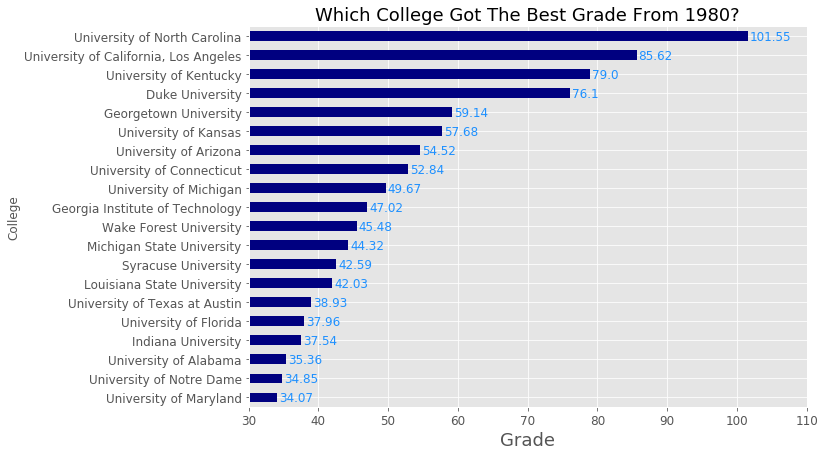

In [36]:
# plotb = top30.plot(kind='bar')
# # Showing on the range from 7000-8100, shows the diffrence better in the plot
# plotb = plotb.set_ylim([20,70])
# plotb.invert_yaxis()
# print(plotb)

ax = finalTop20.plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which College Got The Best Grade From 1980?", fontsize=18)
ax.set_xlabel("Grade", fontsize=18);
# ax.set_xticks([25 ,30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100])
ax.set_xlim([30,110])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

## From 2005

In [37]:
collegeCareerTotPlayerLast20 = collegeCareerTotPlayer[collegeCareerTotPlayer['From'] + collegeCareerTotPlayer['Years'] > 2004]
collegeCareerTotPlayerLast20

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531
10,harriaa01,Aaron Harrison,3.0,2016.0,2018.0,198.12,210.0,"October 28, 1994",University of Kentucky,0.0,...,0.216,0.946,1.162,0.432,0.405,0.054,0.189,1.081,2.135,0.757
11,holidaa01,Aaron Holiday,1.0,2019.0,2019.0,185.42,185.0,"September 30, 1996","University of California, Los Angeles",0.0,...,0.100,1.240,1.340,1.740,0.420,0.260,0.800,1.420,5.880,4.100
12,jacksaa01,Aaron Jackson,1.0,2018.0,2018.0,193.04,185.0,"May 6, 1986",Duquesne University,0.0,...,0.500,0.375,0.875,0.375,0.000,0.000,0.375,0.750,1.625,0.500
13,mckieaa01,Aaron McKie,13.0,1995.0,2007.0,195.58,209.0,"October 2, 1972",Temple University,0.0,...,0.607,2.688,3.295,2.722,1.144,0.202,1.336,2.050,7.582,7.460
14,milesaa01,Aaron Miles,1.0,2006.0,2006.0,185.42,175.0,"April 13, 1983",University of Kansas,0.0,...,0.000,0.737,0.737,1.263,0.211,0.053,0.579,0.684,0.842,1.211


In [38]:
prizedPlayersLast20 = collegeCareerTotPlayerLast20.iloc[:,:24]
prizedPlayersLast20['Total'] = prizedPlayersLast20['MVP'] + prizedPlayersLast20['Finals MVP'] + prizedPlayersLast20['All-Star MVP'] + prizedPlayersLast20['Most Improved'] + prizedPlayersLast20['Sixth Man'] + prizedPlayersLast20['Defence Player']+ prizedPlayersLast20['Rookie'] + prizedPlayersLast20['All Tot'] + prizedPlayersLast20['All-Star'] + prizedPlayersLast20['D Tot']
prizedPlayersLast20 = prizedPlayersLast20[prizedPlayersLast20['Total'] > 0]
prizedPlayersLast20.head()

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,mckieaa01,Aaron McKie,13.0,1995.0,2007.0,195.58,209.0,"October 2, 1972",Temple University,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,horfoal01,Al Horford,12.0,2008.0,2019.0,208.28,245.0,"June 3, 1986",University of Florida,0.0,...,0.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,1.0,7.0
37,hendeal01,Alan Henderson,12.0,1996.0,2007.0,205.74,235.0,"December 2, 1972",Indiana University,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
60,houstal01,Allan Houston,12.0,1994.0,2005.0,198.12,200.0,"April 20, 1971",University of Tennessee,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0


In [39]:
collegeListLast20 = prizedPlayersLast20.drop_duplicates(subset='Colleges', keep='first')
collegeListLast20 = collegeListLast20.iloc[:, 8].tolist()
collegeListLast20 = np.array(collegeListLast20, dtype=pd.Series)
print(collegeListLast20)

['University of Oregon' 'Temple University' 'University of Florida'
 'Indiana University' 'University of Tennessee' 'Georgetown University'
 'University of Connecticut' 'University of Arizona'
 'University of Colorado' 'University of Utah' 'University of Kansas'
 'University of Memphis' 'University of North Carolina'
 'University of Kentucky' 'University of Texas at El Paso'
 'University of Alabama' 'University of Texas at Austin'
 'University of California, Los Angeles' 'Louisiana State University'
 'Virginia Union University' 'University of Oklahoma'
 'University of Minnesota' 'DePaul University' 'Purdue University'
 'University of Washington' 'Stanford University'
 'California State University, Fullerton' 'Lehigh University'
 'Duke University' 'Syracuse University' 'Georgia Institute of Technology'
 'Central Michigan University' 'Wake Forest University'
 'University of Michigan' 'University of Arkansas' 'Ohio State University'
 'Clemson University' 'Weber State University'
 'Bradley

In [40]:
collStatsLast20 = []
collegeSuccessLast20 = pd.DataFrame()
collegeSuccessCol = ['College', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie', 'Total Prized Players']
for c in range(0, len(collegeListLast20)):
    collStatsLast20 = []
    tot = 0
    currCollLast20 = collegeCareerTotPlayerLast20[collegeCareerTotPlayerLast20.Colleges == collegeListLast20[c]]
#     College Name
    collStatsLast20.append(collegeListLast20[c])
#     Precent of All-Star
    currAllStarLast20 = currCollLast20[currCollLast20['All Tot'] > 0].shape[0]
    collStatsLast20.append(currAllStarLast20)
    currDefTotLast20 = currCollLast20[currCollLast20['D Tot'] > 0].shape[0]
    collStatsLast20.append(currDefTotLast20)
    for i in range(3, len(collegeSuccessCol) - 1):
#     Precent of All-NBA Team
        currStatsLast20 = currCollLast20[currCollLast20[collegeSuccessCol[i]] > 0].shape[0]
        collStatsLast20.append(currStatsLast20)
    tot = (prizedPlayersLast20[prizedPlayersLast20['Colleges'] == collegeListLast20[c]]).shape[0]
    collStatsLast20.append(tot)
    collStatsLast20 = pd.DataFrame(collStatsLast20)
    collStatsLast20 = pd.DataFrame(collStatsLast20.transpose())
    collStatsLast20.columns = collegeSuccessCol
    collegeSuccessLast20 = pd.concat([collegeSuccessLast20, collStatsLast20])
# collegeSuccess['Tot'] = collegeSuccess['All Star'] + collegeSuccess['All-NBA'] + collegeSuccess['Defence']
collegeSuccessLast20 = collegeSuccessLast20.sort_values('Total Prized Players', ascending=False)
# collegeSuccess.set_index("College", inplace = True) 
collegeSuccessLast20

,College,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Prized Players
0,University of Kentucky,6,5,8,0,0,0,0,0,1,10
0,University of Connecticut,3,1,6,0,2,0,0,0,1,8
0,Duke University,4,2,6,0,0,0,0,0,3,7
0,University of Florida,3,2,4,1,1,0,0,0,1,5
0,Wake Forest University,2,2,4,0,1,1,1,0,2,5
0,University of Michigan,3,0,3,0,1,0,0,1,1,5
0,Michigan State University,3,2,4,1,0,0,0,1,0,5
0,"University of California, Los Angeles",4,1,5,0,0,1,0,1,0,5
0,University of North Carolina,1,1,4,0,1,0,0,0,1,5
0,University of Kansas,2,2,2,0,0,0,1,0,1,4


In [41]:
bla = prizedPlayersLast20[prizedPlayersLast20['Colleges'] == 'Oregon State University']
bla

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total
877,paytoga01,Gary Payton,17.0,1991.0,2007.0,193.04,180.0,"July 23, 1968",Oregon State University,0.0,...,0.0,2.0,5.0,2.0,9.0,9.0,9.0,9.0,0.0,28.0


In [42]:
collStats1Last20 = []
collegeSuccess1Last20 = pd.DataFrame()
collegeSuccessCol1 = ['College', 'Year/PLR', 'All-NBA', 'Defence Team', 'All-Star', 'Defence Player', 'Sixth Man', 'MVP', 'Finals MVP', 'Most Improved', 'Rookie', 'Total Awards']
for c in range(0, len(collegeListLast20) - 1):
    collStats1Last20 = []
    tot1 = 0
    currColl1Last20 = collegeCareerTotPlayerLast20[collegeCareerTotPlayerLast20.Colleges == collegeList[c]]
#     College Name
    collStats1Last20.append(collegeList[c])
#     Years For Player
    numOfPlayersLast20 = currColl1Last20.shape[0]
    collStats1Last20.append(currColl1Last20['Years'].sum() / numOfPlayersLast20)
#     Precent of All-Star
    currAllStar1Last20 = currColl1Last20[currColl1Last20['All Tot'] > 0]['All Tot'].sum()
    collStats1Last20.append((int)(currAllStar1Last20))
    currDefenceTeam1Last20 = currColl1Last20[currColl1Last20['D Tot'] > 0]['D Tot'].sum()
    collStats1Last20.append(currDefenceTeam1Last20)
    tot1 = tot1 + currAllStar1Last20 + currDefenceTeam1Last20
    for i in range(4, len(collegeSuccessCol1) - 1):
#     Precent of All-NBA Team
        currAllStar1 = currColl1Last20[currColl1Last20[collegeSuccessCol1[i]] > 0][collegeSuccessCol1[i]].sum()
        collStats1Last20.append((int)(currAllStar1))
        tot1 = tot1 + currAllStar1
    collStats1Last20.append(tot1)
    collStats1Last20 = pd.DataFrame(collStats1Last20)
    collStats1Last20 = pd.DataFrame(collStats1Last20.transpose())
    collStats1Last20.columns = collegeSuccessCol1
    
    collegeSuccess1Last20 = pd.concat([collegeSuccess1Last20, collStats1Last20])
# collegeSuccess['Tot'] = collegeSuccess['All Star'] + collegeSuccess['All-NBA'] + collegeSuccess['Defence']
addPrizedPlayer = collegeSuccessLast20[['College', 'Total Prized Players']]
collegeSuccess1Last20 = pd.merge(collegeSuccess1Last20, addPrizedPlayer, on='College', how='inner')
rating = []
totalPlayers = pd.Series(collegeSuccess1Last20['Total Prized Players'])
for r in range(0 ,len(collegeSuccess1Last20)):
    if (totalPlayers.values[r] > 0):
        rating.append(round((collegeSuccess1Last20['Sixth Man'].values[r] * 7 + collegeSuccess1Last20['All-NBA'].values[r] * 14 + collegeSuccess1Last20['Defence Team'].values[r] * 6 + collegeSuccess1Last20['All-Star'].values[r] * 12 + collegeSuccess1Last20['Defence Player'].values[r] * 10 + collegeSuccess1Last20['MVP'].values[r] * 20 + collegeSuccess1Last20['Finals MVP'].values[r] * 22 + collegeSuccess1Last20['Most Improved'].values[r] * 4 + collegeSuccess1Last20['Rookie'].values[r] * 7) / totalPlayers.values[r],2))
    else:
        rating.append(0)
collegeSuccess1Last20['Rating'] = rating
collegeSuccess1Last20 = collegeSuccess1Last20.sort_values('Rating', ascending=False)
# collegeSuccess1.set_index("College", inplace = True) 
collegeSuccess1Last20

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


,College,Year/PLR,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Awards,Total Prized Players,Rating
0,Oregon State University,6.28571,9,9,9,1,0,0,0,0,0,28,1,298.00
35,Marquette University,6.07692,10,7,17,0,0,0,1,1,0,36,2,206.00
31,Arizona State University,6.8,6,0,7,0,1,1,0,0,0,15,1,195.00
20,Wake Forest University,10.3,23,24,26,0,1,2,3,0,2,81,5,181.00
29,Georgetown University,7.70588,12,9,28,7,0,1,0,0,1,58,4,163.75
32,University of Texas at Austin,6.63158,14,2,17,0,0,1,2,0,1,37,3,161.00
41,University of Oklahoma,4.5,5,0,6,0,0,0,0,0,1,12,1,149.00
2,Virginia Union University,17.5,5,8,5,5,0,0,0,0,0,23,2,114.00
8,"University of California, Los Angeles",7.31429,14,2,21,0,0,1,0,1,0,39,5,96.80
28,University of California,6.52941,6,9,11,0,0,0,0,2,1,29,3,95.00


In [43]:
collegeSuccess1Last20['ScaledRating'] = (collegeSuccess1Last20['Rating']) / 50;
collegeSuccess1Last20['ScaledRating'] =  round(collegeSuccess1Last20['ScaledRating'] , 2)
collegeSuccess1Last20

,College,Year/PLR,All-NBA,Defence Team,All-Star,Defence Player,Sixth Man,MVP,Finals MVP,Most Improved,Rookie,Total Awards,Total Prized Players,Rating,ScaledRating
0,Oregon State University,6.28571,9,9,9,1,0,0,0,0,0,28,1,298.00,5.96
35,Marquette University,6.07692,10,7,17,0,0,0,1,1,0,36,2,206.00,4.12
31,Arizona State University,6.8,6,0,7,0,1,1,0,0,0,15,1,195.00,3.90
20,Wake Forest University,10.3,23,24,26,0,1,2,3,0,2,81,5,181.00,3.62
29,Georgetown University,7.70588,12,9,28,7,0,1,0,0,1,58,4,163.75,3.28
32,University of Texas at Austin,6.63158,14,2,17,0,0,1,2,0,1,37,3,161.00,3.22
41,University of Oklahoma,4.5,5,0,6,0,0,0,0,0,1,12,1,149.00,2.98
2,Virginia Union University,17.5,5,8,5,5,0,0,0,0,0,23,2,114.00,2.28
8,"University of California, Los Angeles",7.31429,14,2,21,0,0,1,0,1,0,39,5,96.80,1.94
28,University of California,6.52941,6,9,11,0,0,0,0,2,1,29,3,95.00,1.90


In [44]:
collegeLast20 = (collegeCareerTotPlayerLast20['Colleges'].value_counts())
collegeLast20 = collegeLast20.iloc[0:]
collegeDFLast20 = pd.DataFrame(collegeLast20)
collegeDFLast20 = collegeDFLast20.reset_index()
collegeDFLast20 = collegeDFLast20.rename(columns = {'index':'College' , 'Colleges':'Total Players'})
collegeDFLast20 = pd.DataFrame(collegeDFLast20)
collegeDFLast20.head()

,College,Total Players
0,University of Kentucky,56
1,Duke University,43
2,University of Kansas,38
3,University of North Carolina,36
4,"University of California, Los Angeles",35


In [45]:
collegeDFCopyLast20 = collegeDFLast20
collegeSuccessCopyLast20 = collegeSuccessLast20[['College', 'Total Prized Players']]
collegeSuccess1CopyLast20 = collegeSuccess1Last20[['College', 'Year/PLR', 'Total Awards', 'ScaledRating']]

In [46]:
collegeDFCopyLast20 = pd.merge(collegeDFCopyLast20, collegeSuccessCopyLast20, on = 'College', how='inner')
collegeDFCopyLast20 = pd.merge(collegeDFCopyLast20, collegeSuccess1CopyLast20, on = 'College', how = 'inner')
# newCollegeSuc['Ratio'] = newCollegeSuc['Tot_y'] / newCollegeSuc['Tot_x']
# newCollegeSuc = pd.merge(newCollegeSuc, collegeDF, on = 'College', how = 'outer')
# newCollegeSuc = newCollegeSuc.sort_values('Ratio', ascending=False)
collegeDFCopyLast20.head(30)

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating
0,University of Kentucky,56,10,5.51786,49,1.05
1,Duke University,43,7,6.30233,35,1.16
2,University of Kansas,38,4,5.81579,23,1.38
3,University of North Carolina,36,5,8.19444,21,0.96
4,"University of California, Los Angeles",35,5,7.31429,39,1.94
5,University of Arizona,29,4,6.75862,14,0.73
6,University of Connecticut,24,8,8.625,30,0.85
7,Michigan State University,24,5,6.58333,19,0.76
8,Syracuse University,23,3,4.82609,21,1.72
9,University of Michigan,22,5,6.63636,23,1.04


In [47]:
# collegeDFCopyLast20['Year/PLR'] = scale(collegeDFCopyLast20['Year/PLR'].data);
# collegeDFCopyLast20['Year/PLR'] =  round(collegeDFCopyLast20['Year/PLR'] , 2)

collegeDFCopyLast20['College Grade'] = ((collegeDFCopyLast20['Total Players'] * collegeDFCopyLast20['Year/PLR'] * 20) + (collegeDFCopyLast20['Total Prized Players'] * collegeDFCopyLast20['ScaledRating'] * 80)) / 100
collegeDFCopyLast20 = collegeDFCopyLast20.sort_values('College Grade', ascending=False)
collegeDFCopyLast20.head()

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating,College Grade
0,University of Kentucky,56,10,5.51786,49,1.05,70.2
3,University of North Carolina,36,5,8.19444,21,0.96,62.84
1,Duke University,43,7,6.30233,35,1.16,60.696
4,"University of California, Los Angeles",35,5,7.31429,39,1.94,58.96
2,University of Kansas,38,4,5.81579,23,1.38,48.616


In [48]:
finalLast20 = collegeDFCopyLast20[['College', 'College Grade']]
roundGradeLast20 = []
for n in finalLast20['College Grade']:
    roundGradeLast20.append(round(n, 2))
# print(roundGrade)
finalLast20['College Grade'] = roundGradeLast20
finalLast20Top20 = finalLast20.head(20)
finalLast20Top20.index = finalLast20Top20['College']
del finalLast20Top20['College']
finalLast20Top20

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,College Grade
College,
University of Kentucky,70.20
University of North Carolina,62.84
Duke University,60.70
"University of California, Los Angeles",58.96
University of Kansas,48.62
University of Connecticut,46.84
University of Arizona,41.54
Georgetown University,36.70
Wake Forest University,35.08


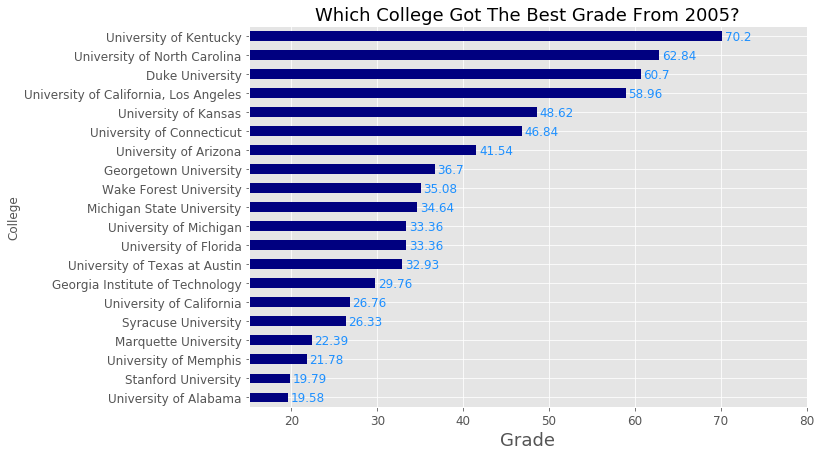

In [49]:
# plotb = top30.plot(kind='bar')
# # Showing on the range from 7000-8100, shows the diffrence better in the plot
# plotb = plotb.set_ylim([20,70])
# plotb.invert_yaxis()
# print(plotb)

ax = finalLast20Top20.plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which College Got The Best Grade From 2005?", fontsize=18)
ax.set_xlabel("Grade", fontsize=18);
# ax.set_xticks([25 ,30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100])
ax.set_xlim([15,80])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

In [50]:
resultCollegeGrade = finalTop20
resultCollegeGrade = pd.merge(resultCollegeGrade, finalLast20Top20, on='College', how='inner')
resultCollegeGrade = resultCollegeGrade.rename(columns = {'College Grade_x':'1980' , 'College Grade_y':'2005'})
resultCollegeGrade

,1980,2005
College,,
University of North Carolina,101.55,62.84
"University of California, Los Angeles",85.62,58.96
University of Kentucky,79.00,70.20
Duke University,76.10,60.70
Georgetown University,59.14,36.70
University of Kansas,57.68,48.62
University of Arizona,54.52,41.54
University of Connecticut,52.84,46.84
University of Michigan,49.67,33.36


In [51]:
# resultCollegeGrade['1980'] = scale(resultCollegeGrade['1980'])
# resultCollegeGrade['2005'] = scale(resultCollegeGrade['2005'])
resultCollegeGrade

,1980,2005
College,,
University of North Carolina,101.55,62.84
"University of California, Los Angeles",85.62,58.96
University of Kentucky,79.00,70.20
Duke University,76.10,60.70
Georgetown University,59.14,36.70
University of Kansas,57.68,48.62
University of Arizona,54.52,41.54
University of Connecticut,52.84,46.84
University of Michigan,49.67,33.36


Beat defence college

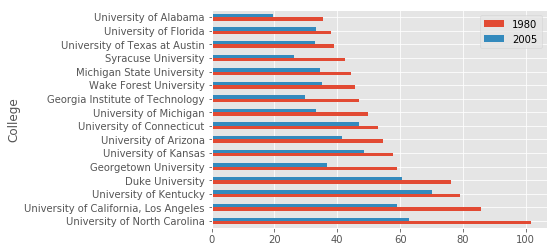

In [52]:
df = pd.DataFrame({'1980': resultCollegeGrade['1980'], '2005': resultCollegeGrade['2005']}, index=resultCollegeGrade.index)
ax = df.plot.barh(rot=0)

In [57]:
careerTotalDB['Total Players'].sum()

2504

In [61]:
collegeDFCopyLast20

,College,Total Players,Total Prized Players,Year/PLR,Total Awards,ScaledRating,College Grade
0,University of Kentucky,56,10,5.51786,49,1.05,70.2
3,University of North Carolina,36,5,8.19444,21,0.96,62.84
1,Duke University,43,7,6.30233,35,1.16,60.696
4,"University of California, Los Angeles",35,5,7.31429,39,1.94,58.96
2,University of Kansas,38,4,5.81579,23,1.38,48.616
6,University of Connecticut,24,8,8.625,30,0.85,46.84
5,University of Arizona,29,4,6.75862,14,0.73,41.536
15,Georgetown University,17,4,7.70588,58,3.28,36.696
29,Wake Forest University,10,5,10.3,81,3.62,35.08
7,Michigan State University,24,5,6.58333,19,0.76,34.64


In [59]:
careerTotalDB

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,...,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,...,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,...,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,...,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,...,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,...,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,...,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,...,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,...,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,...,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531


In [280]:
from math import pi

# number of variable
categories=['College Grade', 'Total Prized Players', 'Total Awards','Year/PLR', 'Total Players']
# categories=list(categories)[:]
N = len(categories)
print(categories)
 

['College Grade', 'Total Prized Players', 'Total Awards', 'Year/PLR', 'Total Players']


In [281]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=collegeDFCopyLast20[categories].loc[0].values.flatten().tolist()


values2=collegeDFCopyLast20[categories].loc[1].values.flatten().tolist()
# values = values[['Year/PLR', 'Total Awards', 'Total Prized Players', 'ScaledRating']]
values2

values3 = collegeDFCopyLast20[categories].loc[2].values.flatten().tolist()
values3

values4 = collegeDFCopyLast20[categories].loc[3].values.flatten().tolist()
values4

[62.84, 5, 21.0, 8.194444444444445, 36]

In [282]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
angles


[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

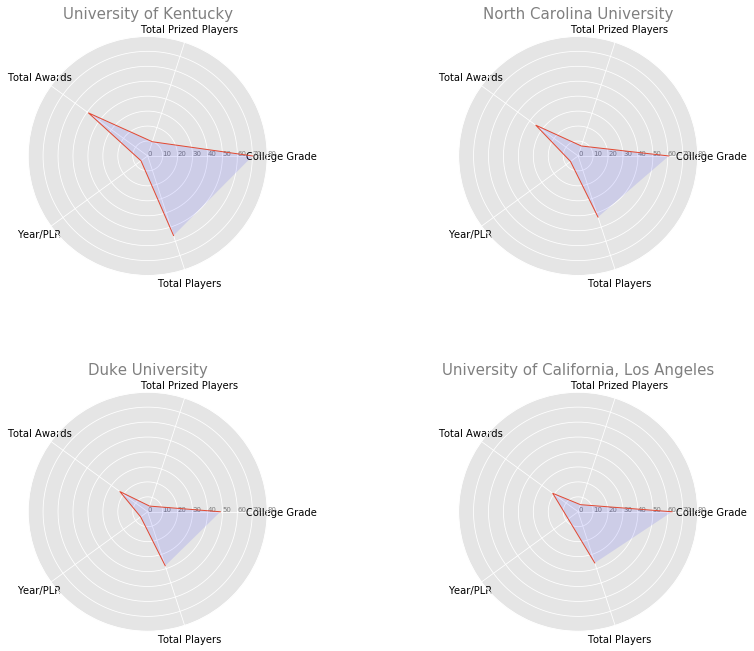

In [309]:
plt.rcParams['figure.figsize'] = (12, 12)

# Initialise the spider plot
ax = plt.subplot(221, polar=True)


# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ["0", "10", "20", "30", "40", "50", "60", "70", "80"], color="grey", size=7)
plt.ylim(0,80)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'blue', alpha=0.1)
plt.title('1.University of Kentucky', fontsize = 15, color='gray')

ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ["0", "10", "20", "30", "40", "50", "60", "70", "80"], color="grey", size=7)
plt.ylim(0,80)
 
# Plot data
ax.plot(angles, values2, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values2, 'blue', alpha=0.1)
plt.title('2.North Carolina University', fontsize = 15, color='gray')

ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ["0", "10", "20", "30", "40", "50", "60", "70", "80"], color="grey", size=7)
plt.ylim(0,80)
 
# Plot data
ax.plot(angles, values3, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values3, 'blue', alpha=0.1)
plt.title('3.Duke University', fontsize = 15, color='gray')

ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ["0", "10", "20", "30", "40", "50", "60", "70", "80"], color="grey", size=7)
plt.ylim(0,80)
 
# Plot data
ax.plot(angles, values4, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values4, 'blue', alpha=0.1)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.subplots_adjust(wspace=0.8)
plt.title('4.University of California, Los Angeles', fontsize = 15, color='gray')

plt.show()